In [1]:
# use kernel version 3.11.0
import numpy as np
from numpy import asarray
import os
from tqdm import tqdm
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout, Dense
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage import color
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float, exposure
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from skimage.filters import threshold_otsu
from skimage.color import label2rgb
from skimage.morphology import closing, square
from skimage.measure import label, regionprops
from skimage.segmentation import clear_border
from keras.preprocessing import image






In [2]:

def numpize(image_path: str, img_size=(128, 128), grayscale=False):
    """
    Convert a single image to a NumPy array.
    Parameters:
    - image_path (str): Path to the input image.
    - img_size (tuple): Tuple representing the desired size of the image after resizing.
    - grayscale (bool): If True, convert the image to grayscale.
    Returns:
    - numpy_array (numpy.ndarray): NumPy array containing the transformed image.
    """
    image = Image.open(image_path)

    # Ensure all images are in the same format
    if grayscale:
        image = image.convert('L')  # Convert to grayscale
    else:
        image = image.convert('RGB')  # Convert to RGB

    # Resize the image to the specified size without padding
    resized_image = image.resize(img_size)
    data = np.asarray(resized_image)

    return data

In [3]:
img_path = r'C:\Users\prasa\Downloads\TB_Chest_Radiography_Database\Normal\Normal-75.png'
i=numpize(img_path,(128, 128),grayscale=False)
len(i)


128

In [4]:
def img_and_hist(image_data, axes, bins=100):
    '''
    Plot an image along with its histogram and cumulative histogram.

    Parameters:
        - image_data (ndarray): Grayscale image data as a numpy array.
        - axes (list): List of axes for displaying the image, histogram, and cumulative histogram.
        - bins (int): Number of bins for the histogram.

    Returns:
        None

    This function displays an image along with its histogram and cumulative histogram. It takes the grayscale image data, a list of axes for plotting, and the number of bins for the histogram.
    '''
    image = img_as_float(image_data)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel Intensity')
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return

def plot_gray_scale_histogram(image, title, bins=100):
    '''
    Plot Gray Scale Histogram of an Image.

    Parameters:
        - image (numpy.ndarray): Grayscale image to plot histogram for.
        - title (str): Title for the histogram.
        - bins (int, optional): Number of bins for the histogram. Default is 100.

    Returns:
        None

    This function generates a histogram for a grayscale image and displays it along with the image.
    '''
    # Display results
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    img_and_hist(image, axes, bins)

    mean_value = np.mean(image)
    std_value = np.std(image)
    min_value = np.min(image)
    max_value = np.max(image)

    axes[0].set_title('Image\nMean: {:.2f}, Std: {:.2f}, Min: {:.2f}, Max: {:.2f}'.format(
        mean_value, std_value, min_value, max_value), fontsize=12)
    axes[0].set_axis_off()

    y_min, y_max = axes[1].get_ylim()
    axes[1].set_title('Distribution of Pixel Intensities')
    axes[1].set_ylabel('Number of Pixels')
    axes[1].set_yticks(np.linspace(0, y_max, 5))
    
#  these are the exlanations which we will be passing to the frontend (by json or waht ever is suitable)
    # plt.suptitle(title, fontsize=14)
    # plt.text(0.05, 0.95, "Explanation:", transform=plt.gcf().transFigure, fontsize=14, fontweight='bold')
    # plt.text(0.05, 0.9, "- Pixel Intensity ranges from 0 (completely black) to 255 (completely white)", transform=plt.gcf().transFigure, fontsize=12)
    # plt.text(0.05, 0.85, "- The X-axis (Pixel intensity) represents the entire dataset's darkness (closer to 0) to brightness (closer to 255)", transform=plt.gcf().transFigure, fontsize=12)
    # plt.text(0.05, 0.8, "- The Slope of the Red line refers to the brightness or darkness of the entire dataset:", transform=plt.gcf().transFigure, fontsize=12)
    # plt.text(0.1, 0.75, "  - Right-Skewed Distribution indicates brighter areas with a higher mean pixel intensity", transform=plt.gcf().transFigure, fontsize=12)
    # plt.text(0.1, 0.7, "  - Left-Skewed Distribution indicates darker areas with a lower mean pixel intensity", transform=plt.gcf().transFigure, fontsize=12)
    # plt.text(0.05, 0.65, "So:", transform=plt.gcf().transFigure, fontsize=12)
    # plt.text(0.1, 0.6, "- X_Tuberculosis exhibits brighter or whiter areas", transform=plt.gcf().transFigure, fontsize=12)
    # plt.text(0.1, 0.55, "- X_Normal exhibits darker areas", transform=plt.gcf().transFigure, fontsize=12)

    plt.tight_layout()
    plt.savefig('images_exp\BACKEND_histogram_output.png', bbox_inches='tight')

    plt.show()


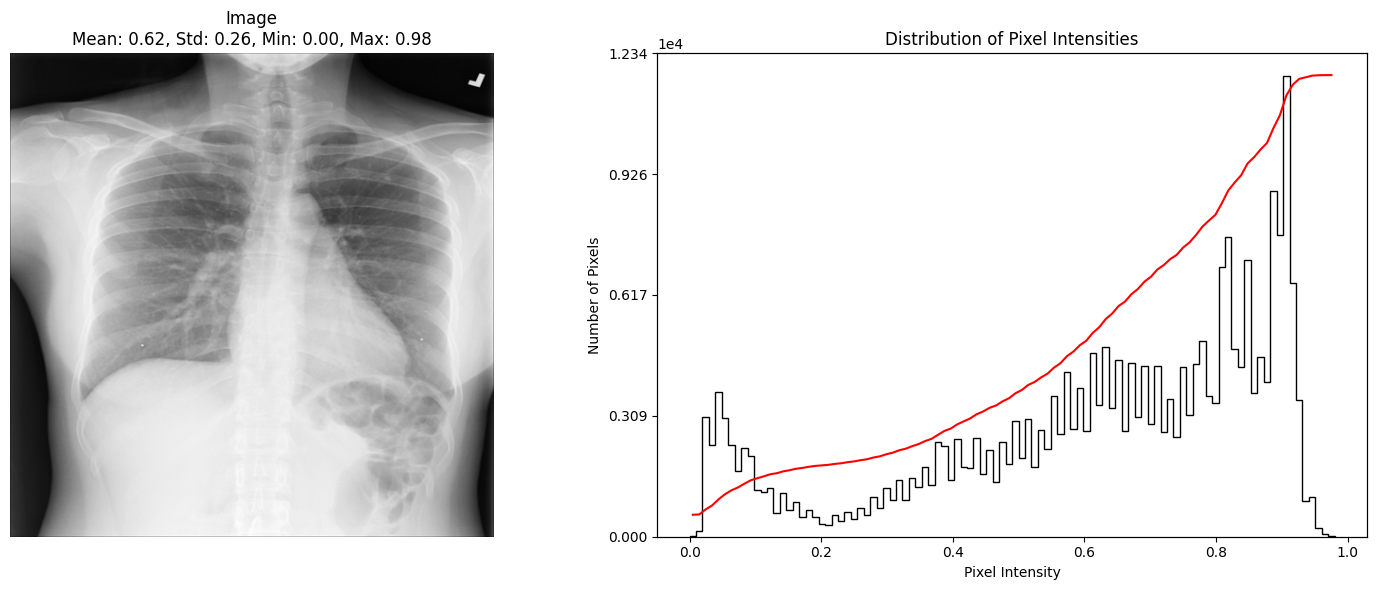

<Figure size 640x480 with 0 Axes>

In [5]:
from skimage import io

# Load the image
image = io.imread(img_path, as_gray=True)

# Call the function to plot the grayscale histogram
plot_gray_scale_histogram(image, "Histogram of Normal-999.png")

# Ensure the plot is fully rendered before saving
plt.tight_layout()

# Save the plot as an image

# Display the plot
plt.show()


In [6]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("trainedmodel.h5")

In [7]:
import numpy as np
from tensorflow.keras.preprocessing import image
# Load an example image for prediction

# img_path = "C:/Users/prasa/Downloads/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-95.png"
# "C:\Users\prasa\Downloads\TB_Chest_Radiography_Database\Tuberculosis\Tuberculosis-77.png"
img = image.load_img(img_path, target_size=(128, 128))  # Adjust the target size based on your model's input shape
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image

# Make a prediction
prediction = model.predict(img_array)
print(prediction)

# Print the prediction result
if prediction[0] >=0.8:
    print("Tuberculosis")
else:
    print("Normal")


1/1 [==============================] - 0s 468ms/step
[[0.00079305]]
Normal


In [8]:
class ImageSegmentation:
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def lung_segmentation(self, X):
        if X.shape != self.input_shape:
            X = X[:, :, 0]

        # Equalize the image with CLAHE
        X = exposure.equalize_adapthist(
            X, kernel_size=None, clip_limit=0.01, nbins=256)

        # Create a binary threshold mask and apply it to the image
        thresh = threshold_otsu(image=X, nbins=256, hist=None)
        thresh = X > thresh
        bw = closing(X > thresh, square(1))

        # Clean up the borders
        cleared = clear_border(bw)

        # Label image regions
        label_image = label(cleared)
        image_label_overlay = label2rgb(
            label_image,
            image=X,
            bg_label=0,
            bg_color=(0, 0, 0))

        return image_label_overlay, label_image
    

    def show_segmented_images(self,images, target, title, num_display=16, num_cols=4, cmap='gray', random_mode=False,only_segmented=True):
        '''
        :Parameters
            images (ndarray (n,)): Input data as a numpy array.
            target (ndarray (n,)): Target data as a numpy array.
            title (String): Title of the plot.
            num_display (int): Number of images to display. Default is 16.
            num_cols (int): Number of columns in the plot. Default is 4.
            cmap (str): Color map for displaying images. Default is 'gray'.
            random_mode (bool): If True, display images randomly. If False, display the first num_display images. Default is False.
        '''
        # Determine the number of rows based on the num_cols parameter
        n_cols = min(num_cols, num_display)
        n_rows = int(np.ceil(num_display / n_cols))

        n_images = min(num_display, len(images))
        if random_mode:
            random_indices = np.random.choice(
                len(images), num_display, replace=False)
        else:
            random_indices = np.arange(num_display)

        fig, axes = plt.subplots(
            nrows=n_rows, ncols=n_cols, figsize=(20, 4*n_rows))
        for i, ax in enumerate(axes.flatten()):
            if i >= n_images:  # Check if the index exceeds the available number of images
                break
            # Incase (Did PCA)
            index = random_indices[i]
            if len(images.shape) == 2:
                image = images[index].reshape((128, 128)).astype(int)
            else:
                image = images[index]

            image_label_overlay, label_image = self.lung_segmentation(
                image)
                
            ax.imshow(
                label_image if only_segmented else image_label_overlay, cmap=cmap)
            ax.set_title("Target: {}".format(target[index]))

            # Add image index as text
            ax.text(0.5, -0.15, f'Image Index: {index}', transform=ax.transAxes,
                    fontsize=10, ha='center')

        plt.suptitle(f"{title} (Displaying {num_display} Images)",
                    fontsize=16, fontweight='bold')

        fig.set_facecolor('white')
        plt.tight_layout()  # Added to ensure proper spacing between subplots
        return plt.show()
    
    
    def show_segmented_image_from_path(self, image_path):
        # Load image from file path
        img = Image.open(image_path)

        # Preprocess the image (resize, convert to numpy array, etc.)
        img_array = np.array(img)  # Assuming img is a PIL Image
        # Additional preprocessing steps if needed...

        # Apply lung segmentation
        image_label_overlay, _ = self.lung_segmentation(img_array)

        # Display the segmented image
        plt.imshow(image_label_overlay, cmap='gray')
        plt.title("Lung Segmentation")
        plt.savefig("images_exp\segmented Image")
        plt.show()

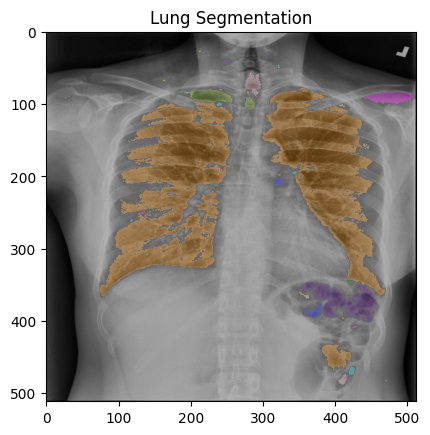

In [9]:
segmentation_model = ImageSegmentation(input_shape=(128, 128, 3))

# Provide the image path to get lung segmentation
lung_segmentation_result = segmentation_model.show_segmented_image_from_path(img_path)

# Display the segmented image


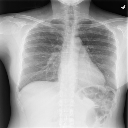

In [11]:
img

In [12]:

# Lime
import lime
from lime.lime_image import LimeImageExplainer, ImageExplanation
# Ski
from skimage.segmentation import mark_boundaries
from skimage.color import gray2rgb
from skimage.transform import resize
import skimage.segmentation
# common
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import random
import cv2
import matplotlib.patches as mpatches
from skimage.filters import threshold_otsu
from skimage.exposure import equalize_adapthist
from skimage.color import label2rgb
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import square, closing
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.filters import sobel
from skimage.color import rgb2gray

class Explainer():
    def __init__(self, estimator, input_shape=None, threshold=None):
        self.estimator = estimator
        self.input_shape = input_shape

    def lime(self, X, y, top_labels, num_samples, num_features, class_names, num_display, method='slic', random_mode=False, cmap='gray'):
        '''
        Explain and visualize model predictions using LIME (Local Interpretable Model-Agnostic Explanations).

        Parameters:
            X (ndarray): Input data as a numpy array.
            y (ndarray): Target data as a numpy array.
            top_labels (int): Top coefficients to show (e.g., 1 for binary classification).
            num_samples (int): Number of perturbations to generate.
            num_features (int): Number of highlighted features (segmented areas) to extract.
            model (object): Trained machine learning model.
            class_names (list): List of class names.
            num_display (int): Number of images to display.
            random_mode (bool, optional): If True, display images randomly. Default is False.
            cmap (str, optional): Colormap for displaying images. Default is 'gray'.

        Returns:
            None

        This function explains and visualizes model predictions using LIME. It generates explanations for model predictions and displays them along with various image representations.

        Note:
        - The `X` input should have a shape like (num_images, width, height, channels) (e.g., (100, 128, 128, 1)).
        - The `class_names` list should contain class labels.
        - The function displays the explanations and does not return any values.
        '''

        # Model prediction
        
        y_hat = self.estimator.predict(X)
        prediction = (y_hat > 0.5).astype(int).flatten()

        n_cols = 5  # Display 5 images in each row

        title = r'$\bf{' + "Actual-Image" + '}$' + " vs " + \
            r'$\bf{' + "Model-Prediction" + '}$'

        n_images = min(num_display, len(X))

        if random_mode:
            random_indices = np.random.choice(
                len(X), num_display, replace=False)
        else:
            random_indices = np.arange(num_display)

        for i, idx in enumerate(random_indices):
            
            X_resized = tf.image.resize(X[idx], self.input_shape).numpy()
#             # Change to RBG for input in Lime
#             rgb_resized_image = cv2.cvtColor(X_resized, cv2.COLOR_GRAY2RGB)
            rgb_resized_image = X_resized
            explainer = LimeImageExplainer()

            def model_pred_fn(images):
                y_hat = self.estimator.predict(images)
                return y_hat
            
            def segment_fn(image):
                if method == 'felzenszwalb':
                    segments = felzenszwalb(image, scale=200, sigma=0.5, min_size=50)
                elif method == 'slic':
                    segments = slic(image, n_segments=50, compactness=10, sigma=1)
                elif method == 'quickshift':
                    segments = quickshift(image, kernel_size=2, max_dist=50, ratio=0.5)
                elif method == 'watershed':
                    gradient = sobel(rgb2gray(image))
                    segments = watershed(gradient, markers=50, compactness=0.001)
                elif method == 'lung_segmentation':
                    segments = self.lung_segmentation(image)
                else:
                    raise ValueError(
                        "Invalid segmentation method. Supported methods: 'felzenszwalb', 'slic', 'quickshift', 'watershed', 'lung_segmentation'")

                return segments

            explanation = explainer.explain_instance(
                rgb_resized_image,
                model_pred_fn,
                top_labels=top_labels,
                hide_color=0,
                num_samples=num_samples,
                segmentation_fn=segment_fn,
            )
            #  positive_only=True if prediction[idx] ==0  else False,
            temp, mask = explanation.get_image_and_mask(
                explanation.top_labels[0],
                positive_only=False,
                num_features=num_features,
                hide_rest=False,
                min_weight=0.0
                )

            # Create a figure with 1 row and 5 columns
            fig, axes = plt.subplots(1, n_cols, figsize=(30, 6))

            # Add a big header title above the subplots
            plt.suptitle(
                title, fontsize=16)

            # First axis: Actual Image
            axes[0].imshow(X_resized, cmap=cmap) 
            actual_title = r'$\bf{' + 'Actual' + '}$'
            actual_cls = class_names[int(y[idx])]

            model_title = r'$\bf{' + 'Model-Prediction' + '}$'
            model_cls = class_names[int(prediction[idx])]
            model_prob = '{:.9f}'.format(float(y_hat[idx]))
            axes[0].set_title(actual_title + '\nTarget: ' + actual_cls)

            image_label_overlay = label2rgb(
                segment_fn(rgb_resized_image),
                image=rgb_resized_image,
                bg_label=0,
                bg_color=(0, 0, 0))

            axes[1].imshow(X_resized, cmap=cmap)
            axes[1].imshow(image_label_overlay)

            axes[1].set_title(model_title + '\nTarget: ' + model_cls)

            axes[2].imshow(segment_fn(rgb_resized_image),cmap='binary')
            axes[2].set_title(
                r'$\bf{' + 'Segmentation' + '}$' + f'\nProbability: ' + model_prob)
            
            # Third axis: Explanation Image
            axes[3].imshow(mark_boundaries(
                rgb_resized_image, segment_fn(rgb_resized_image)))
            axes[3].set_title(
                r'$\bf{' + 'LIME-Explanation' + '}$' + f'\nnumber of segments: {len(np.unique(segment_fn(rgb_resized_image)))}')
            temp, mask = explanation.get_image_and_mask(
                0,
                positive_only=True if prediction[idx] == 0 else False,
                num_features=num_features,
                hide_rest=False,
                min_weight=0.0
            )
            # Third axis: Explanation Image
            axes[4].imshow(mark_boundaries(
                temp, mask))
            axes[4].set_title(
                r'$\bf{' + 'LIME-Explanation' + '}$' + f'\nPositive and Negative regions')

            # Add the image index text
            plt.text(0.5, -0.15, f'Image Index: {idx}', transform=axes[0].transAxes,
                     fontsize=10, ha='center')

            plt.tight_layout()
            plt.savefig('Lime_output.png', bbox_inches='tight')


            plt.show()

    def diff_sementation(self):
        # Generate a random sample index
        # sample_index = random.randint(0, X.shape[0] - 1)

#         # Get the single grayscale sample
#         grayscale_sample = X[sample_index]

#         # Convert to RGB by repeating the single channel along the third axis
#         img = np.repeat(grayscale_sample, 3, axis=2)

        segments_fz = felzenszwalb(i, scale=200, sigma=0.5, min_size=50)
        segments_slic = slic(i, n_segments=50, compactness=10, sigma=1)
        segments_quick = quickshift(i, kernel_size=2, max_dist=50, ratio=0.5)
        gradient = sobel(rgb2gray(i))
        segments_watershed = watershed(gradient, markers=50, compactness=0.001)
        segments_equalize_adapthist = self.lung_segmentation(i)

        fig, ax = plt.subplots(1, 5, figsize=(30, 6))

        ax[0].imshow(mark_boundaries(img, segments_fz))
        ax[0].set_title("Felzenszwalbs's method")
        ax[0].text(
            0.5, -0.05, f"number of segments: {len(np.unique(segments_fz))}", transform=ax[0].transAxes, ha='center')

        ax[1].imshow(mark_boundaries(img, segments_slic))
        ax[1].set_title('SLIC')
        ax[1].text(
            0.5, -0.05, f"number of segments: {len(np.unique(segments_slic))}", transform=ax[1].transAxes, ha='center')

        ax[2].imshow(mark_boundaries(img, segments_quick))
        ax[2].set_title('Quickshift')
        ax[2].text(
            0.5, -0.05, f"number of segments: {len(np.unique(segments_quick))}", transform=ax[2].transAxes, ha='center')

        ax[3].imshow(mark_boundaries(img, segments_watershed))
        ax[3].set_title('Compact watershed')
        ax[3].text(
            0.5, -0.05, f"number of segments: {len(np.unique(segments_watershed))}", transform=ax[3].transAxes, ha='center')
        ax[4].imshow(mark_boundaries(img, segments_equalize_adapthist))
        ax[4].set_title('lung_segmentation')
        ax[4].text(
            0.5, -0.05, f"number of segments: {len(np.unique(segments_equalize_adapthist))}", transform=ax[4].transAxes, ha='center')

        for a in ax.ravel():
            a.set_axis_off()

        plt.tight_layout()
        plt.savefig('\images_exp\LIME_EXP')
        plt.show()

    def lung_segmentation(self, X):
        # Single of exmaple
        X = X[:, :, 0]

        # Even out the contrast with CLAHE
        X_equalized = equalize_adapthist(
            X, kernel_size=None, clip_limit=0.05, nbins=256)

        # Make a binary threshold mask and apply it to the image
        thresh = threshold_otsu(image=X_equalized, nbins=256, hist=None)
        thresh = X_equalized > thresh
        bw = closing(X_equalized > thresh, square(1))

        # Clean up the borders
        cleared = clear_border(bw)

        # Label image regions
        label_image = label(cleared)
        

        return label_image


In [13]:
class CNN:
    def __init__(self, 
                 input_shape=(128, 128, 3), 
                 unit_size_rate=0.05, 
                 conv_padding='same', 
                 conv_kernel_size=(3, 3),
                 conv_stride=1, 
                 pool_padding='same', 
                 pool_kernel_size=(2, 2), 
                 pool_stride=2, 
                 dropout=0, 
                 l1_lambda=None,
                 l2_lambda=None, 
                 pooling_type='max', 
                 epochs=5, 
                 batch_size=64, 
                 verbose=1):  
        self.input_shape = input_shape
        self.unit_size_rate = unit_size_rate
        self.conv_padding = conv_padding
        self.conv_kernel_size = conv_kernel_size
        self.conv_stride = conv_stride
        self.pool_padding = pool_padding
        self.pool_kernel_size = pool_kernel_size
        self.pool_stride = pool_stride
        self.dropout = dropout
        self.l1_lambda = l1_lambda
        self.l2_lambda = l2_lambda
        self.pooling_type = pooling_type
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = self.build_model()

    def build_model(self):
        reg_l1 = None
        reg_l2 = None

        if self.l1_lambda is not None:
            reg_l1 = tf.keras.regularizers.l1(self.l1_lambda)

        if self.l2_lambda is not None:
            reg_l2 = tf.keras.regularizers.l2(self.l2_lambda)

        if len(self.input_shape) == 2:
            # Add color channel for grayscale images
            self.input_shape = self.input_shape + (1,)

        model = Sequential()
        model.add(Conv2D(
            int(32 * self.unit_size_rate),
            self.conv_kernel_size,
            strides=self.conv_stride,
            padding=self.conv_padding,
            activation='relu',
            kernel_regularizer=reg_l1,
            input_shape=self.input_shape))

        if self.pooling_type == 'max':
            model.add(MaxPooling2D(
                pool_size=self.pool_kernel_size,
                strides=self.pool_stride,
                padding=self.pool_padding))
        elif self.pooling_type == 'avg':
            model.add(AveragePooling2D(
                pool_size=self.pool_kernel_size,
                strides=self.pool_stride,
                padding=self.pool_padding))
        else:
            raise ValueError("Invalid pooling_type. Use 'max' or 'avg'.")

        model.add(Conv2D(
            int(64 * self.unit_size_rate),
            self.conv_kernel_size,
            strides=self.conv_stride,
            padding=self.conv_padding,
            kernel_regularizer=reg_l2,
            activation='relu'))

        if self.pooling_type == 'max':
            model.add(MaxPooling2D(
                pool_size=self.pool_kernel_size,
                strides=self.pool_stride,
                padding=self.pool_padding))
        elif self.pooling_type == 'avg':
            model.add(AveragePooling2D(
                pool_size=self.pool_kernel_size,
                strides=self.pool_stride,
                padding=self.pool_padding))
        else:
            raise ValueError("Invalid pooling_type. Use 'max' or 'avg'.")

        model.add(Conv2D(
            int(128 * self.unit_size_rate),
            self.conv_kernel_size,
            strides=self.conv_stride,
            padding=self.conv_padding,
            kernel_regularizer=reg_l2,
            activation='relu'))

        if self.pooling_type == 'max':
            model.add(MaxPooling2D(
                pool_size=self.pool_kernel_size,
                strides=self.pool_stride,
                padding=self.pool_padding))
        elif self.pooling_type == 'avg':
            model.add(AveragePooling2D(
                pool_size=self.pool_kernel_size,
                strides=self.pool_stride,
                padding=self.pool_padding))
        else:
            raise ValueError("Invalid pooling_type. Use 'max' or 'avg'.")

        model.add(Flatten())
        model.add(Dense(
            units=int(128 * self.unit_size_rate),
            activation='relu',
            kernel_regularizer=reg_l2))

        model.add(Dropout(self.dropout))
        model.add(Dense(units=1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def predict(self, X, threshold=0.5, verbose=0):
        return (self.model.predict(X, verbose=verbose) > threshold).astype("int32")

    def summary(self):
        self.model.summary()

    def train(self, X_train, y_train, X_val, y_val, epochs, batch_size, verbose=1):
        history = self.model.fit(
            X_train, y_train,
            batch_size=batch_size if batch_size else self.batch_size,
            epochs=epochs if epochs else self.epochs,
            verbose=verbose,
            validation_data=(X_val, y_val)
        )
        return history

In [14]:
model_config = {
    # (height, width, channels)
    'input_shape': (128, 128,3),
    'unit_size_rate': 0.05,
    'l1_lambda': None,
    'l2_lambda': None,

    'conv_padding': 'same',
    'conv_kernel_size': (3, 3),
    'conv_stride': 1,

    'pool_padding': 'same',
    'pool_kernel_size': (2, 2),
    'pool_stride': 2,
    
    'dropout': 0,
    'pooling_type': 'max'
}

# Build model
model_1st = CNN(**model_config).build_model()
model_1st.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 1)       28        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 1)         0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 3)         30        
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 3)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 6)         168       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 6)       

AttributeError: dtype

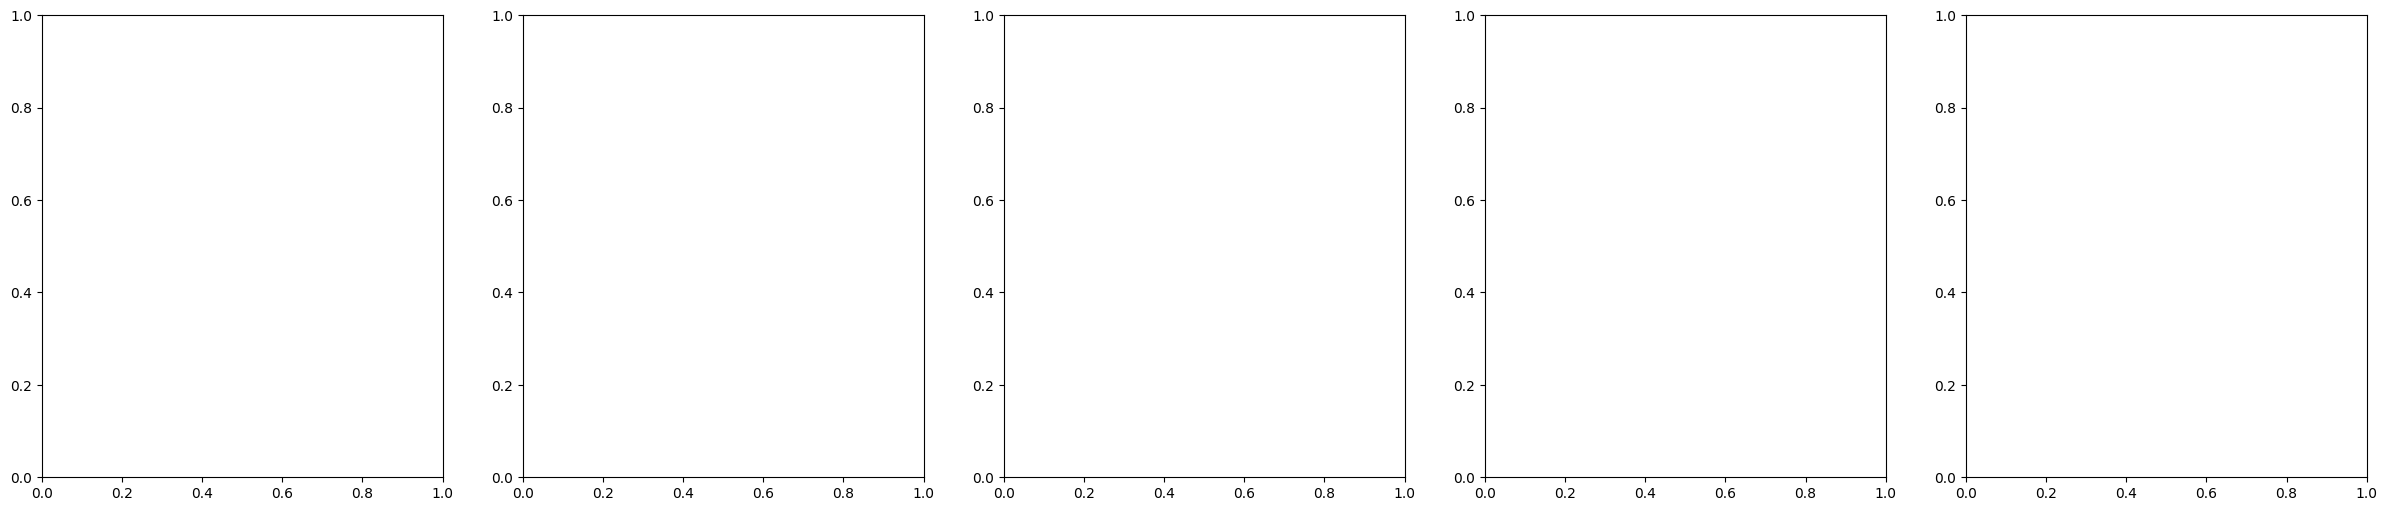

In [15]:

explnr = Explainer(estimator=model_1st, input_shape=(128, 128))
explnr.diff_sementation()

In [47]:
explnr.diff_sementation()

AttributeError: 'NoneType' object has no attribute 'shape'